In [1]:
from scipy.io import loadmat

X = loadmat("all_neurons_20ms.mat")
y = loadmat("locations_20ms.mat")

X = X['mm'].T
y = y['loc'] / 3.5

In [2]:
import numpy as np

print X.shape, y.shape
print np.min(X), np.max(X), np.mean(X)

(54100L, 172L) (54100L, 2L)
0 10 0.0351700124661


In [20]:
XX = []
yy = []
for i in xrange(0, 50, 10):
    X1 = np.reshape(X[i:i-50], (-1, 50, X.shape[1]))
    y1 = np.reshape(y[i:i-50], (-1, 50, y.shape[1]))

    print X1.shape, y1.shape

    X2 = np.sum(X1, axis=1)
    y2 = y1[:,-1,:]

    print X2.shape, y2.shape

    X3 = np.concatenate((X2[:-1], X2[1:]), axis=1)
    y3 = y2[:-1]

    print X3.shape, y3.shape
    
    X4 = X3[:,np.newaxis,:]
    y4 = y3[:,np.newaxis,:]
    
    print X4.shape, y4.shape
    
    XX.append(X4)
    yy.append(y4)

XX = np.concatenate(XX, axis=1)
yy = np.concatenate(yy, axis=1)
print XX.shape, yy.shape

XX = np.reshape(XX, (-1, XX.shape[2]))
yy = np.reshape(yy, (-1, yy.shape[2]))
print XX.shape, yy.shape

(1081L, 50L, 172L) (1081L, 50L, 2L)
(1081L, 172L) (1081L, 2L)
(1080L, 344L) (1080L, 2L)
(1080L, 1L, 344L) (1080L, 1L, 2L)
(1081L, 50L, 172L) (1081L, 50L, 2L)
(1081L, 172L) (1081L, 2L)
(1080L, 344L) (1080L, 2L)
(1080L, 1L, 344L) (1080L, 1L, 2L)
(1081L, 50L, 172L) (1081L, 50L, 2L)
(1081L, 172L) (1081L, 2L)
(1080L, 344L) (1080L, 2L)
(1080L, 1L, 344L) (1080L, 1L, 2L)
(1081L, 50L, 172L) (1081L, 50L, 2L)
(1081L, 172L) (1081L, 2L)
(1080L, 344L) (1080L, 2L)
(1080L, 1L, 344L) (1080L, 1L, 2L)
(1081L, 50L, 172L) (1081L, 50L, 2L)
(1081L, 172L) (1081L, 2L)
(1080L, 344L) (1080L, 2L)
(1080L, 1L, 344L) (1080L, 1L, 2L)
(1080L, 5L, 344L) (1080L, 5L, 2L)
(5400L, 344L) (5400L, 2L)


In [21]:
print np.min(XX), np.max(XX), np.mean(XX)
print np.min(yy), np.max(yy)

0 56 1.75914459518
4.46353517589 107.17104732


[[ 36.58592459  33.4434648 ]
 [ 35.21247798  32.0133551 ]
 [ 35.37787856  32.85315218]
 [ 39.40962414  32.2809194 ]
 [ 49.33792476  29.70000961]
 [ 57.99910505  28.63735564]
 [ 58.8654734   25.19201308]
 [ 57.81221265  18.79908722]
 [ 59.20155197  16.06172331]
 [ 60.03928017  12.3552403 ]]


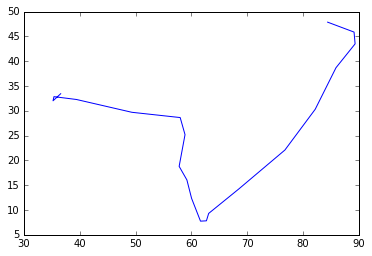

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

print yy[:10]

plt.plot(yy[:20,0],yy[:20,1])

In [28]:
np.save("London_RNN_data_2x1000_at50_bin100-RAW_feat.npy", XX)
np.save("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy", yy)

In [32]:
yya = np.loadtxt("London_RNN_data_2x1000_at50_bin100-RAW_pos.dat")
print yya.shape

(5401L, 2L)


In [33]:
print yy[:10], yya[:10]

[[ 36.58592459  33.4434648 ]
 [ 35.21247798  32.0133551 ]
 [ 35.37787856  32.85315218]
 [ 39.40962414  32.2809194 ]
 [ 49.33792476  29.70000961]
 [ 57.99910505  28.63735564]
 [ 58.8654734   25.19201308]
 [ 57.81221265  18.79908722]
 [ 59.20155197  16.06172331]
 [ 60.03928017  12.3552403 ]] [[ 36.175  33.119]
 [ 35.284  32.016]
 [ 35.507  32.897]
 [ 40.149  32.174]
 [ 50.403  29.391]
 [ 58.481  28.504]
 [ 58.759  24.68 ]
 [ 57.806  18.269]
 [ 59.336  15.856]
 [ 60.133  11.836]]
